In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('full_df.csv', parse_dates=['reporting_time'])
df = df.set_index('reporting_time')
df = df[df['planning_method_latest']!='no Plan']

In [3]:
df.columns

Index(['Unnamed: 0', 'product_name', 'demand', 'demand_lb', 'demand_ub',
       'direct_demand_avg_perc', 'disti_demand_avg_perc',
       'direct_customer_avg_count', 'disti_customer_avg_count',
       'product_application', 'product_main_family', 'product_marketing_name',
       'product_basic_type', 'planning_method_latest',
       'planning_method_reporting_month', 'external1', 'external2',
       'external3', 'external4', 'external5', 'external6', 'external7', 'Open',
       'High', 'Low', 'Close', 'Adj Close', 'Volume'],
      dtype='object')

In [4]:
df.product_application.unique()

array(['gelb', 'rot', 'blau'], dtype=object)

In [5]:
df.product_main_family.unique()

array(['E', 'H', 'D', 'A', 'C', 'B', 'N', 'M', 'F', 'G', 'J', 'L', 'O',
       'S', 'Q', 'T', 'K', 'R', 'U', 'Other'], dtype=object)

In [6]:
(df.product_marketing_name.unique())

array(['hund', 'katze', 'maus', 'fisch'], dtype=object)

In [7]:
len(df.product_basic_type.unique())

250

Text(0.5, 1.0, 'Product 994 demand')

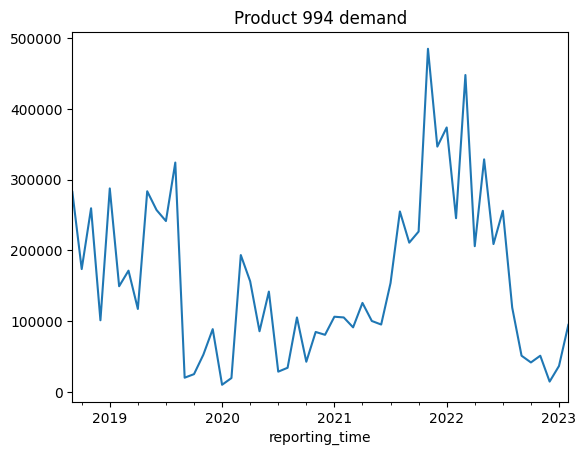

In [8]:
df[df['product_name'] =='P994']['demand'].plot()
plt.title('Product 994 demand')

In [45]:
# For plotting all products to look at their demand

import os

category_list = ['product_application', 'product_main_family', 'product_marketing_name', 'product_basic_type']


for category in category_list:
    category_sections = list(df[category].unique())
    if not os.path.exists(f'./output/{category}'):
        os.makedirs(f'./output/{category}')
    for section in category_sections:
        df_sample = df[df[category]==section].dropna()
        df_sample = df_sample['demand'].resample('M').mean()
        plt.plot(df_sample)
        plt.title(f'{category}_{section} mean performance')
        plt.savefig(f'./output/{category}/{section}')
        plt.close()

<Axes: >

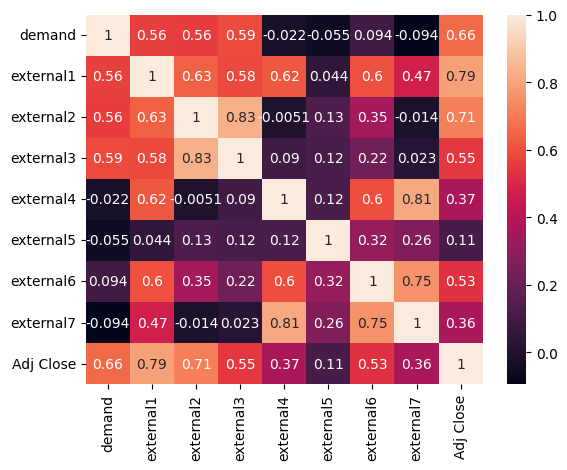

In [10]:
# Checking correlation of variables
test_prod = df[df['product_name'] =='P1002']

sns.heatmap(test_prod[['demand', 'external1', 'external2', 'external3', 'external4', 'external5', 'external6', 'external7', 'Adj Close']].corr(), annot= True)

<Axes: xlabel='reporting_time'>

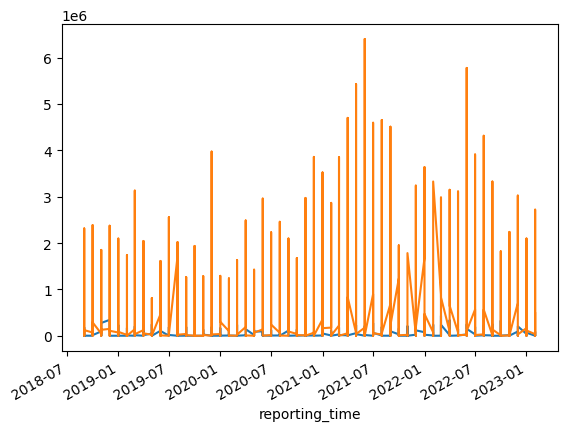

In [96]:
# Understanding the performance of each product family
df[df['product_main_family']=='J']['demand'].plot()

In [ ]:
no_prod = len(df['product_name'].value_counts())
names = list(df['product_name'].value_counts().items())

for prod in names:
    plt.plot(df[df['product_name'] == f'{prod[0]}']['demand'])
    plt.title("demand over time")
    plt.savefig(f'visualisations/initial graphs/{prod[0]}_demand')
    plt.close()

In [10]:
df['product_name'].value_counts().info()

<class 'pandas.core.series.Series'>
Index: 1537 entries, P1875 to P114
Series name: product_name
Non-Null Count  Dtype
--------------  -----
1537 non-null   int64
dtypes: int64(1)
memory usage: 24.0+ KB
